# Nested Cross-Validation for Model Selection and Tuning



**Challenge:** Implement nested cross-validation to compare multiple models and tune their hyperparameters simultaneously.

**Goal:** Prevent biased performance estimates when selecting models using tuning.

**Tools:**
- `GridSearchCV` or `RandomizedSearchCV`
`cross_val_score`
- Different models like RandomForestClassifier, SVC, KNeighborsClassifier

**What to Observe:**
- Compare outer-loop test scores of each algorithm
- Trade-offs between model complexity and performance stability


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)

# Define models and their hyperparameter grids
models_params = [
    {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10]
        }
    },
    {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
]

# Nested cross-validation settings
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Store results
outer_scores = {}

# Perform nested cross-validation for each model
for model_info in models_params:
    model_name = model_info['model'].__class__.__name__
    print(f"\nEvaluating {model_name}...")

    # Initialize list to store outer loop scores
    scores = []

    # Outer loop for performance estimation
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Inner loop for hyperparameter tuning
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['param_grid'],
            cv=inner_cv,
            scoring='accuracy'
        )

        # Fit grid search on training data
        grid_search.fit(X_train, y_train)

        # Evaluate best model on test fold
        best_model = grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)
        scores.append(test_score)

        # Print best parameters for this fold
        print(f"Best params for fold: {grid_search.best_params_}, Test score: {test_score:.4f}")

    # Store outer loop scores
    outer_scores[model_name] = scores
    print(f"{model_name} Outer CV Scores: {scores}")
    print(f"Average Outer CV Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Compare models
print("\nModel Comparison:")
for model_name, scores in outer_scores.items():
    print(f"{model_name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")


Evaluating RandomForestClassifier...
Best params for fold: {'max_depth': 10, 'n_estimators': 50}, Test score: 1.0000
Best params for fold: {'max_depth': None, 'n_estimators': 50}, Test score: 0.9667
Best params for fold: {'max_depth': None, 'n_estimators': 50}, Test score: 0.9333
Best params for fold: {'max_depth': 10, 'n_estimators': 100}, Test score: 0.9333
Best params for fold: {'max_depth': None, 'n_estimators': 100}, Test score: 0.9667
RandomForestClassifier Outer CV Scores: [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Average Outer CV Accuracy: 0.9600 ± 0.0249

Evaluating SVC...
Best params for fold: {'C': 1, 'kernel': 'linear'}, Test score: 1.0000
Best params for fold: {'C': 1, 'kernel': 'linear'}, Test score: 1.0000
Best params for fold: {'C': 10, 'kernel': 'linear'}, Test score: 0.9333
Best params for fold: {'C': 0.1, 'kernel': 'linear'}, Test score: 0.9667
Best params for fold: {'C': 10, 'kernel': 'rbf'}, Test score: 0.9667
SVC Outer 

# Learning Curves and Validation Curves Analysis



**📈 Challenge:** Plot learning and validation curves to diagnose whether a model suffers from high bias or variance.

**Goal:** Use visualization to tune training size or hyperparameters like regularization strength.

**Tools:**
- learning_curve, validation_curve from sklearn.model_selection
- Models like Ridge, LogisticRegression, SVC matplotlib for visualization

**What to Observe:**
- Curve convergence (bias/variance trade-off)
- Optimal training data size
- Overfitting/underfitting diagnostics


Plotting Learning Curve...


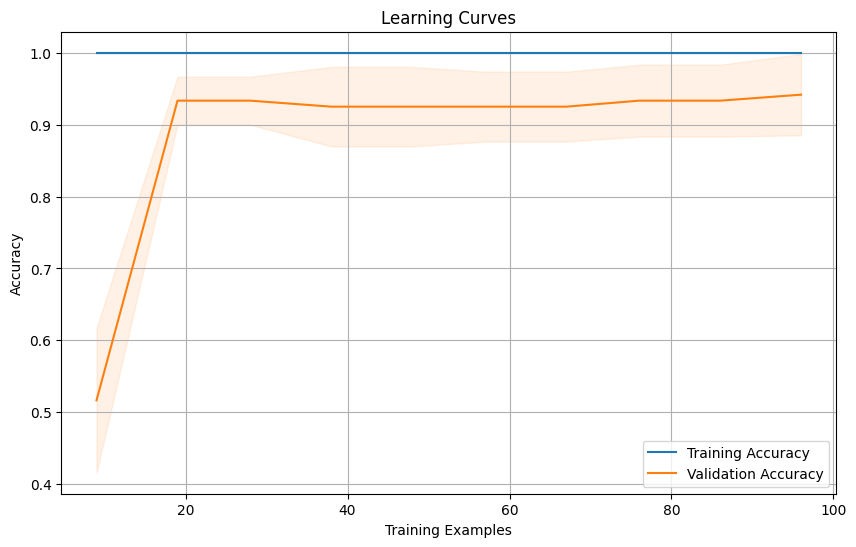

Plotting Validation Curve for max_depth...


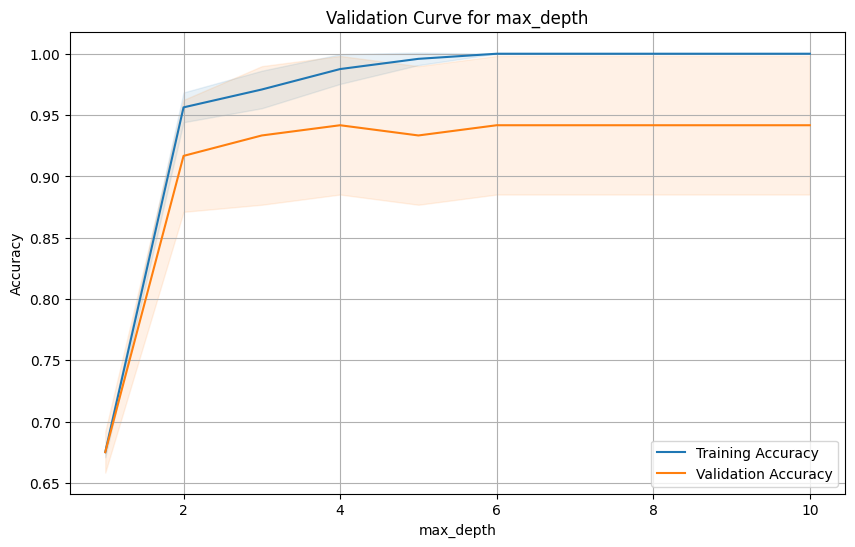


Testing different tree depths:
Depth 1 → Accuracy: 0.63
Depth 3 → Accuracy: 1.00
Depth 5 → Accuracy: 1.00
Depth 10 → Accuracy: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and prepare the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='#1f77b4')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='#ff7f0e')

    # Add shaded areas for standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.1, color='#1f77b4')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.1, color='#ff7f0e')

    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to plot validation curves
def plot_validation_curve(estimator, X, y, param_name, param_range):
    train_scores, val_scores = validation_curve(
        estimator, X, y, param_name=param_name,
        param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label='Training Accuracy', color='#1f77b4')
    plt.plot(param_range, val_mean, label='Validation Accuracy', color='#ff7f0e')

    # Add shaded areas for standard deviation
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std,
                     alpha=0.1, color='#1f77b4')
    plt.fill_between(param_range, val_mean - val_std, val_mean + val_std,
                     alpha=0.1, color='#ff7f0e')

    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'Validation Curve for {param_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Create and analyze DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Plot learning curve
print("Plotting Learning Curve...")
plot_learning_curve(tree, X_train, y_train)

# Plot validation curve for max_depth
print("Plotting Validation Curve for max_depth...")
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot_validation_curve(tree, X_train, y_train, 'max_depth', param_range)

# Your original Activity 3 code (testing different depths)
print("\nTesting different tree depths:")
for depth in [1, 3, 5, 10]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Depth {depth} → Accuracy: {acc:.2f}")

